In [94]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
num = 10
t_init = 0
t_end  = 15

x1_init = 0
z1_init = 1.0
x2_init = 0
z2_init = 1.0

omega1 = 1.0
gamma1 = 0.025
omega2 = 1.2
gamma2 = 0
v = 0
A = 1.0

N      = 10000### Compute 1000 grid points
dt     = float(t_end - t_init) / N 

ts    = np.arange(t_init, t_end, dt)

xs1    = np.zeros(N)
zs1    = np.zeros(N)
xs1[0] = x1_init
zs1[0] = z1_init
xs2    = np.zeros(N)
zs2    = np.zeros(N)
xs2[0] = x2_init
zs2[0] = z2_init

def mu(x, z, omega, gamma, y):
    return -(gamma*z + omega**2*x + v*y)

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[4.47261017 1.57247093 0.60326312 0.31063662 0.18657142 0.12360693
 0.08822575 0.06600174 0.05119735 0.04090656]


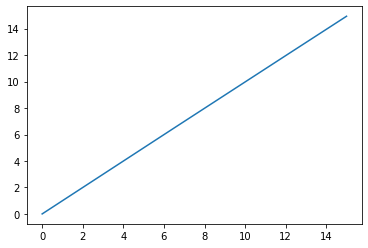

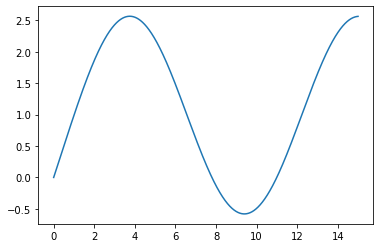

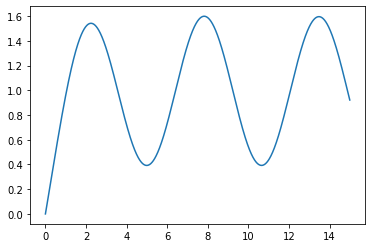

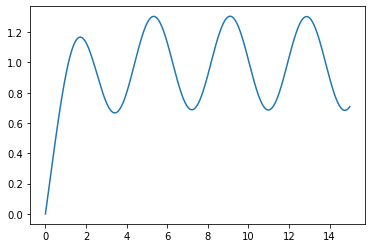

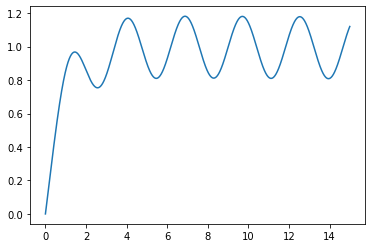

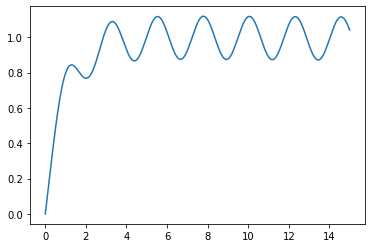

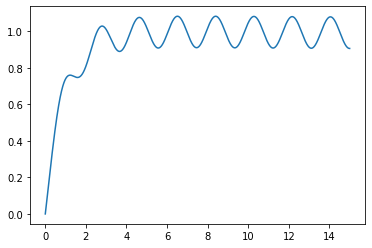

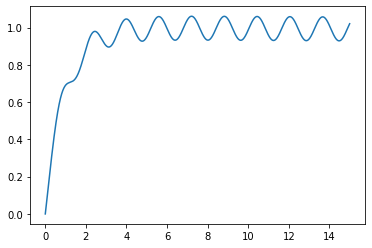

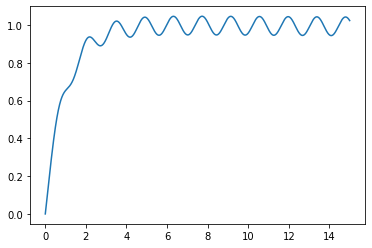

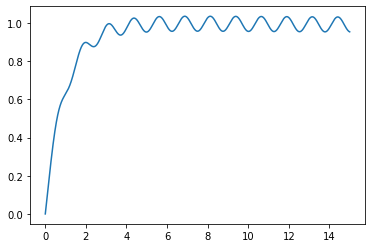

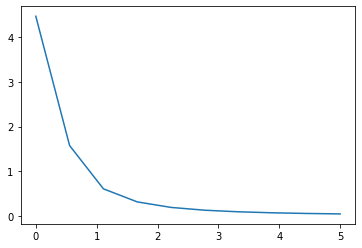

In [100]:
c = np.zeros(num)
k = 0
ww = np.linspace(0,5,num)
for w in ww:
    for i in range(1, ts.size):
        t = (i-1) * dt
        x1 = xs1[i-1]
        z1 = zs1[i-1]
        zs1[i] = z1 + mu(x1, z1,  gamma1, omega1, xs2[i-1]) * dt + A*np.cos(w*t) *dt
        xs1[i] = x1 + z1*dt
        x2 = xs2[i-1]
        z2 = zs2[i-1]
        zs2[i] = z2 + mu(x2, z2, gamma2, omega2, xs1[i]) * dt 
        xs2[i] = x2 + z2*dt
    c[k] = (max(xs1[4000:]) - min(xs1[4000:]))/2.0
    k = k+1
    plt.plot(ts,xs1)
    plt.figure()
plt.plot(ww,c)
#plt.show()
print(ww)
print(c)